In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import urllib.request
from PIL import Image
from pydataset import data
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from wrangle_exercises import *

In [2]:
df = get_mallcustomer_data()
df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [3]:
df, train, validate, test = prep_mall(df)

df: (200, 5)

train: (112, 7)
validate: (48, 7)
test: (40, 7)


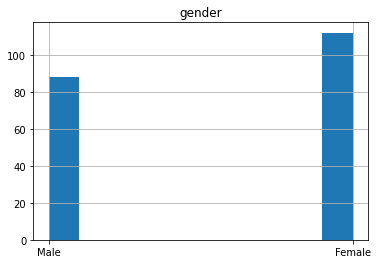

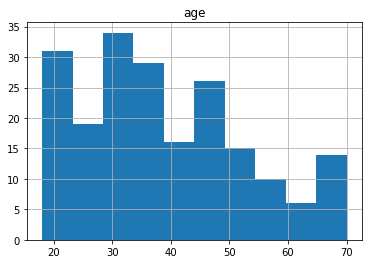

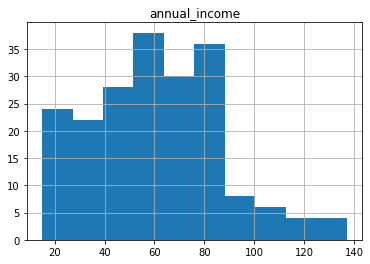

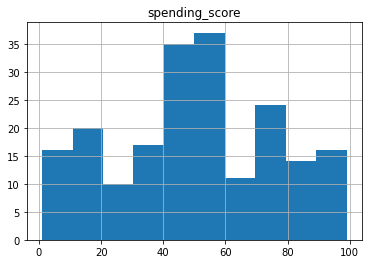

In [4]:
for col in df.columns[:-1]:
    df[col].hist()
    plt.title(col)
    plt.show()

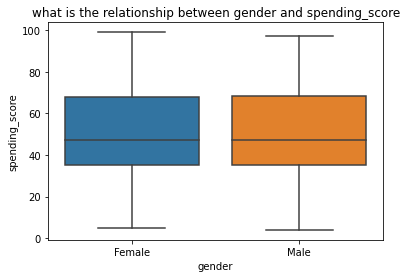

In [5]:
sns.boxplot(data=train, x='gender', y='spending_score')
plt.title('what is the relationship between gender and spending_score')
plt.show()

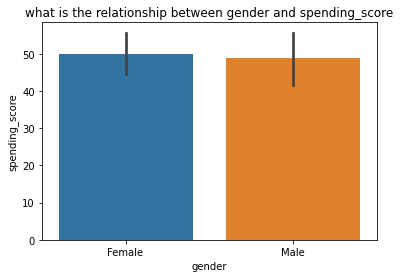

In [6]:
sns.barplot(data=train, x='gender', y='spending_score')
plt.title('what is the relationship between gender and spending_score')
plt.show()

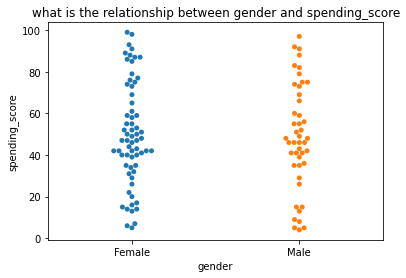

In [7]:
sns.swarmplot(data=train, x='gender', y='spending_score')
plt.title('what is the relationship between gender and spending_score')
plt.show()

In [8]:
α = 0.05

# Levene test for variance.
stat, p = stats.levene(train.spending_score[train.gender=='Male'],
            train.spending_score[train.gender=='Female'])

print(p < α)

False


In [9]:
stat, p = stats.ttest_ind(train[train.gender=='Male'].spending_score, 
                train[train.gender=='Female'].spending_score,
               equal_var=True)

print(p < α)

False


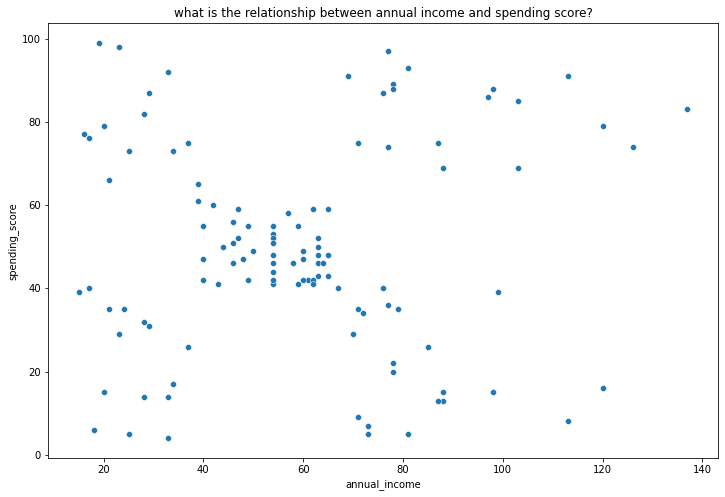

In [10]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=train, x='annual_income', y='spending_score')
plt.title('what is the relationship between annual income and spending score?')
plt.show()

In [11]:
stat, p = stats.spearmanr(train.annual_income, train.spending_score)

print(p < α)

False


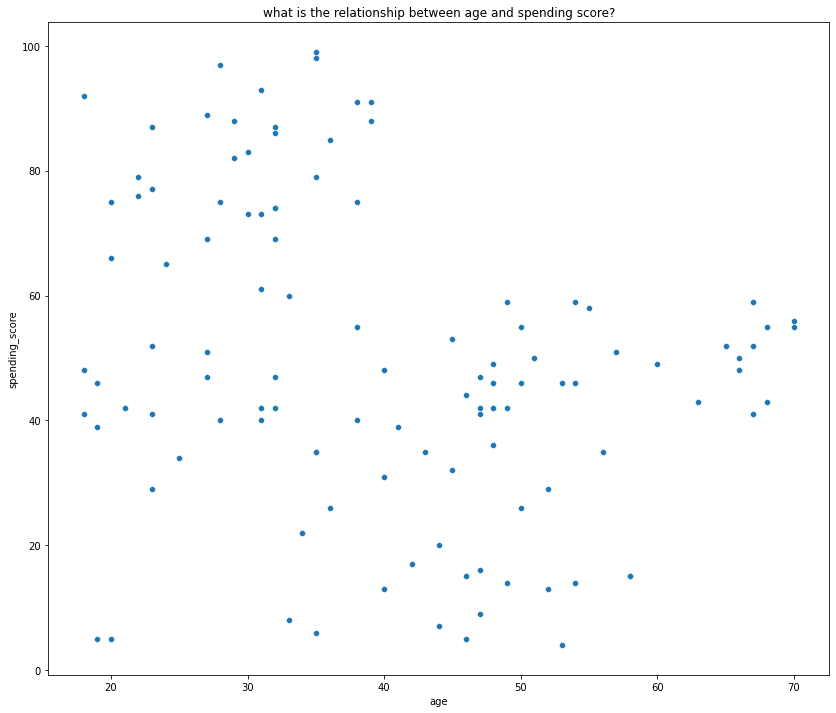

In [13]:
plt.figure(figsize=(14,12))
sns.scatterplot(data=train, x='age', y='spending_score', )
plt.title('what is the relationship between age and spending score?')
plt.show()

In [15]:
train['age_bins'] = pd.cut(train.age,[0,40,80], labels=['40_and_under', 'over_40'])

train.age_bins.value_counts()

40_and_under    62
over_40         50
Name: age_bins, dtype: int64

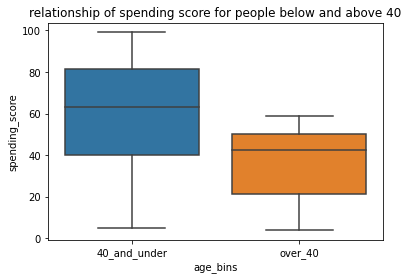

In [16]:
sns.boxplot(data=train, x='age_bins', y='spending_score')
plt.title('relationship of spending score for people below and above 40')
plt.show()

In [17]:
stat, p = stats.levene(train.spending_score[train.age_bins == '40_and_under'],
             train.spending_score[train.age_bins == 'over_40'],)

print(p < α)       

True


In [18]:
stat, p = stats.ttest_ind(train.spending_score[train.age_bins == '40_and_under'],
             train.spending_score[train.age_bins == 'over_40'],
               equal_var=False)

print(p < α)  

True


In [20]:
train['income_bins'] = pd.cut(train.annual_income, [0,50,140])

Interaction of variables along with income bins


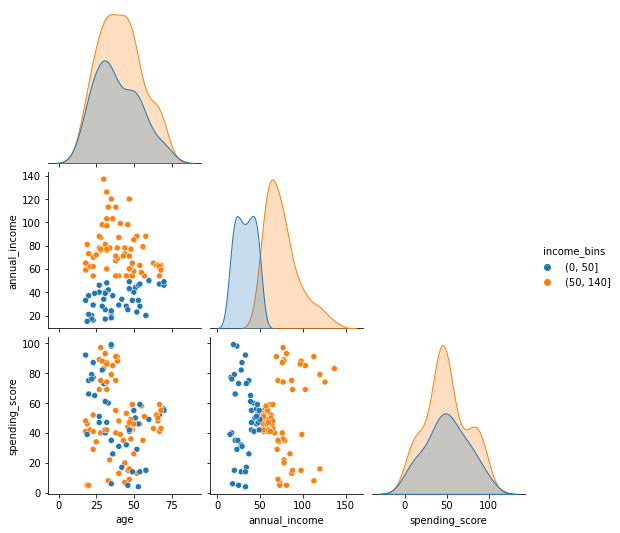

In [21]:
print("Interaction of variables along with income bins")
sns.pairplot(train[['gender', 'age', 'annual_income', 'spending_score', 'income_bins']], 
             corner=True,
             hue='income_bins'
            )
plt.show()

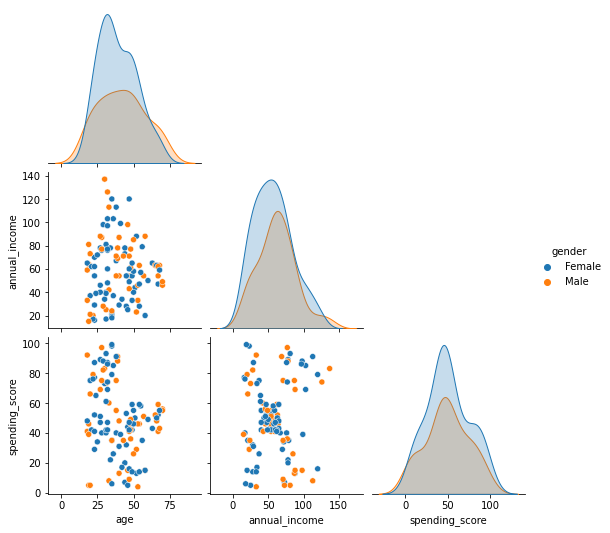

In [22]:
sns.pairplot(train[['gender', 'age', 'annual_income', 'spending_score']], 
             corner=True,
             hue='gender'
            )
plt.show()